In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error

##  <font color = 'red'> **Dataset 1: FUEL CONSUMPTION** </font>

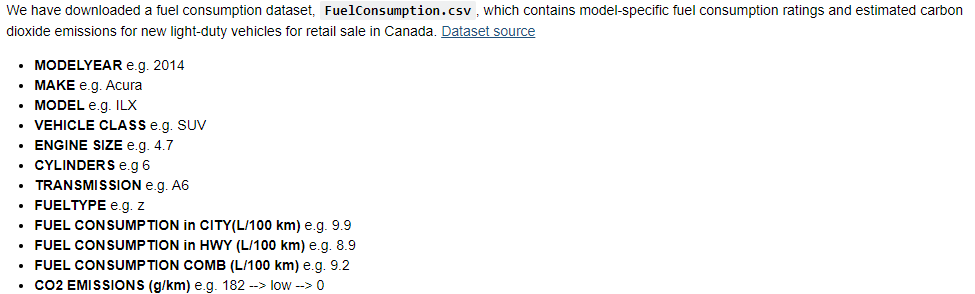

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-03-07 09:30:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   134KB/s    in 0.5s    

2024-03-07 09:30:13 (134 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## **STEP 0: DATA EXPLORATION**

In [3]:
df = pd.read_csv("FuelConsumptionDataset.csv")
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


/home/dsc2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


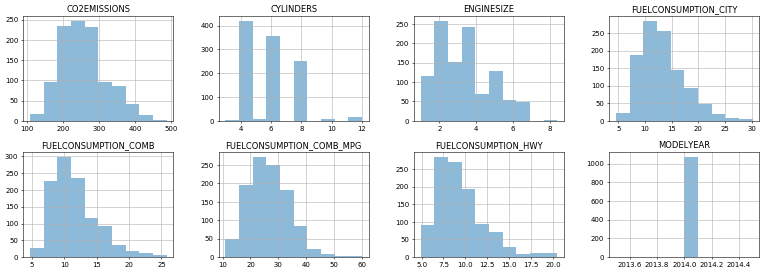

In [4]:
fig, ax = plt.subplots(figsize=(19,10), dpi=50);
df.hist(ax=ax, layout=(3,4), alpha=0.5);

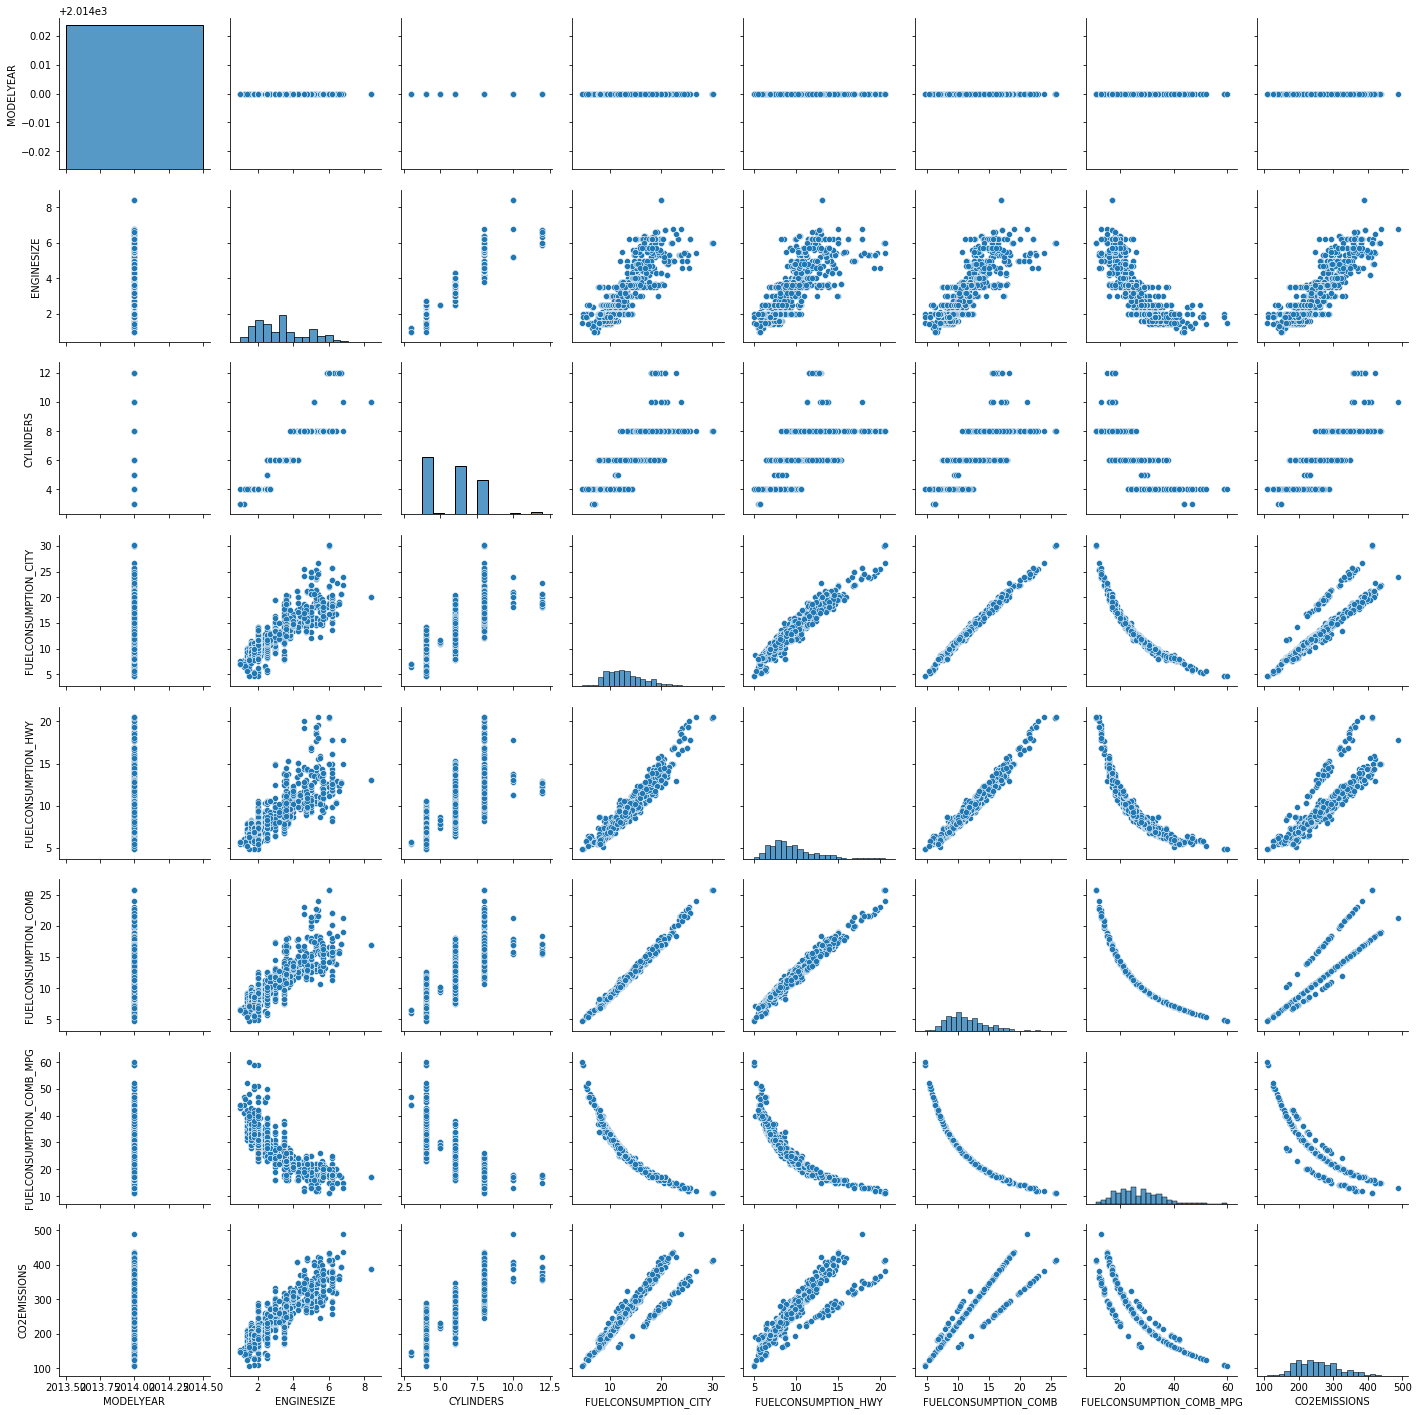

In [5]:
sns.pairplot(df)

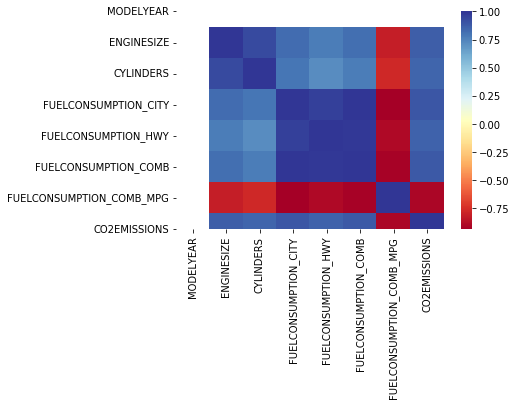

In [6]:
sns.heatmap(df.corr(), cmap='RdYlBu')

## **STEP 1: PRE-PROCESSING**
REMOVING NULL-VALUES AND OUTLIERS

**1. Determing null values**

In [7]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

**2. Determining Outliers**

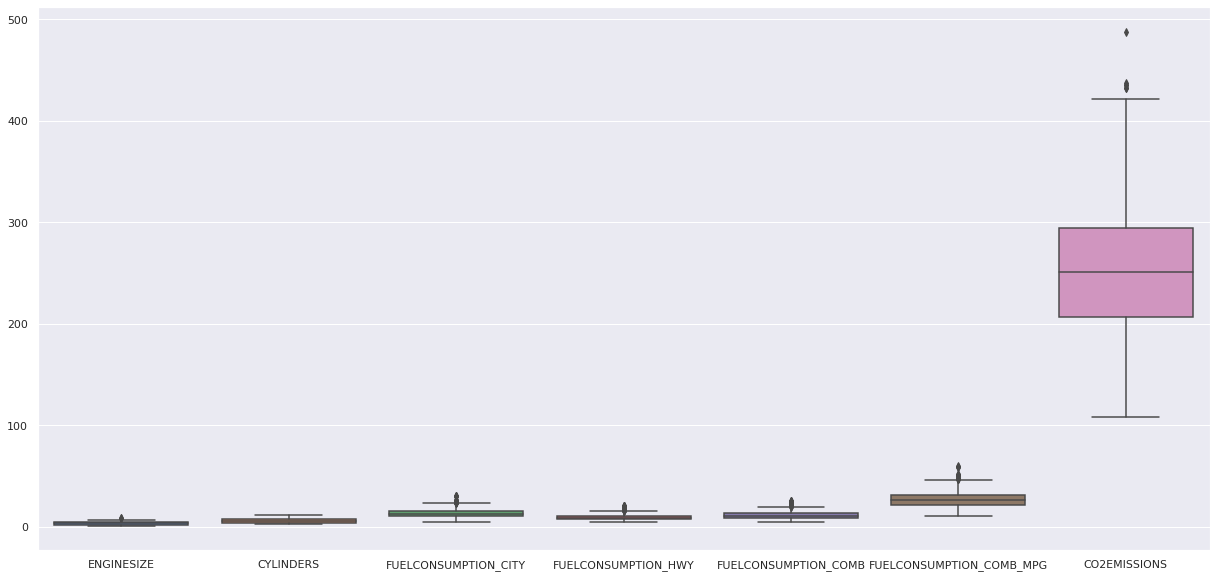

In [8]:
sns.set(rc={'figure.figsize':(21,10)})
sns.boxplot(data=df.iloc[:,1:])

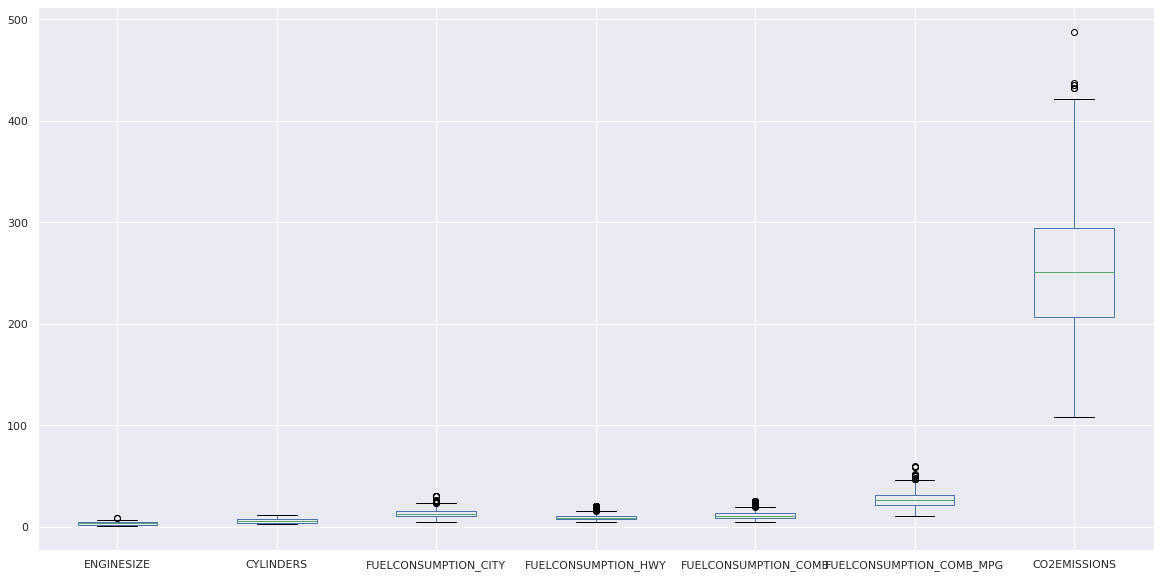

In [9]:
df.iloc[:,1:].boxplot(figsize=(20,10))

## **STEP 2: TRAIN-TEST SPLIT and Feature Scaling (Part of Pre-processing)**

In [10]:
#features = 'ENGINESIZE'
features =  ['ENGINESIZE']
X = df[features].values
Y = df['CO2EMISSIONS'].values

**FEATURE SCALING/ Standardization/ Normalization**

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print("Mean and Standard Deviation Before")
print(X.mean(), X.std())

#**********************************************
##### TO DO: Standardize X part [feature wise scaling!!!!!]
##### and ensure that resultant data has mean around 0 and standard deviation 1 !!!
XScaled=StandardScaler().fit_transform(X)



print("Mean and Standard Deviation After")
print(XScaled.mean(), XScaled.std())

Mean and Standard Deviation Before
3.346298031865042 1.4152314024298263
Mean and Standard Deviation After
2.6637028519591385e-17 1.0


**Train-Test Split**

In [12]:
from sklearn.model_selection import train_test_split
#***************************************************************
######### SPLIT THE X AND Y into trainining and test partitions with 80%-20%split
#<Hint: Fix a random state so that same partition is generated everytime>
#****************************************************************

X_train, X_test, Y_train, Y_test=train_test_split(XScaled,Y,random_state=51,test_size=0.20)


print("Dimensions of Original Data:")
print("Size(X):", X.shape, "; Size(Y)", Y.shape)
print("Dimensions of Training Data:")
print("Size(X_train):", X_train.shape, "; Size(Y_train)", Y_train.shape)
print("Dimensions of Test Data:")
print("Size(X_test):", X_test.shape, "; Size(Y_test)", Y_test.shape)

Dimensions of Original Data:
Size(X): (1067, 1) ; Size(Y) (1067,)
Dimensions of Training Data:
Size(X_train): (853, 1) ; Size(Y_train) (853,)
Dimensions of Test Data:
Size(X_test): (214, 1) ; Size(Y_test) (214,)


#### HELP MODULE [NORMALIZATION!!!]

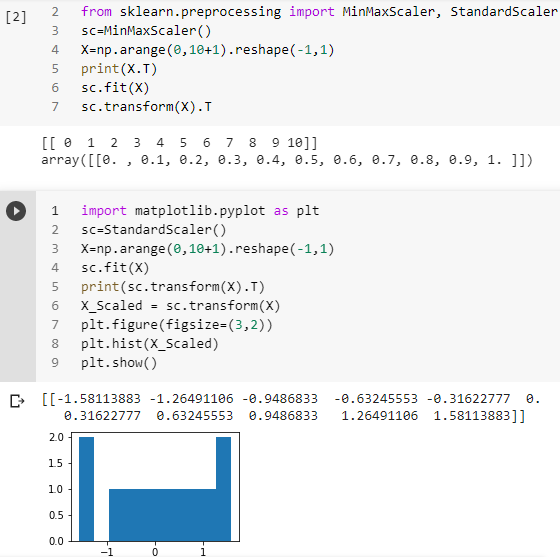

## **STEP 3: FITTING LINEAR REGRESSION MODEL ON TRAINING DATA**

### <font color='red'>**3.1 UNIVARIATE LINEAR REGRESSION**</font>

In [13]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

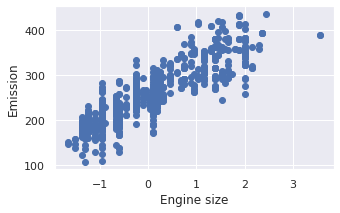

In [14]:
X = X_train[:,0]
Y = Y_train
sns.set(rc={'figure.figsize':(5,3)})
plt.scatter(x = X, y = Y)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [15]:
XY=X*Y
X_squared=X**2



<font color='blue'>**A. ESTIMATING PARAMETERS USING ORDINARY LEAST SQUARE METHOD**:</font>
   
    Y_PRED = WX + B

    W = summation(x_i-x_mean)(y_i-y_mean) / summation(x_i-x_mean)^2
    B = y_mean - W*x_mean

In [16]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)
XY_mean=np.mean(XY)
X_squared_mean=np.mean(X_squared)


W = (XY_mean-(X_mean*Y_mean))/(X_squared_mean-(X_mean**2))   #REGRESSION_COEFFICIENT
B = Y_mean- W*X_mean   #INTERCEPT




print("Weight/Slope W:", W)
print("Bias/Intercept B:", B)

Weight/Slope W: 54.82189158298207
Bias/Intercept B: 255.93085789568457


Mean Squared Error (MSE): 959.12
Root Mean Squared Error(RMSE): 30.97
R squared error (R2): 0.68


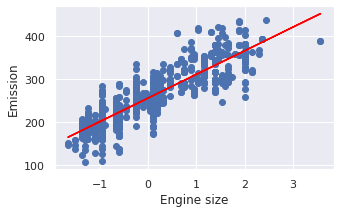

In [17]:
from sklearn import metrics
Y_PRED = np.dot(W,X) + B
# REGRESSION EVALUATION METRICS!!!
print("Mean Squared Error (MSE): %.2f" % np.mean((Y_PRED - Y) ** 2))# metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error(RMSE): %.2f" % np.sqrt(np.mean((Y_PRED - Y) ** 2)))
print('R squared error (R2): %.2f' % metrics.r2_score(Y_PRED, Y))
#R-squared is not error, but is a popular metric for accuracy of your model.
#It represents how close the data are to the fitted regression line.
#The higher the R-squared, the better the model fits your data. Best possible score is 1.0
plt.scatter(x = X, y = Y)
plt.plot(X, Y_PRED, color  = "red")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<font color='blue'> **B. NORMAL EQUATION METHOD** </font>

$W = (X^TX)^{−1} X^TY$


In [18]:
#X=M
#X TRANSPOSE IS m


m=np.array([np.ones(X.shape[0]),X])
M=m.T
mul=np.dot(m,M)
inv=np.linalg.inv(mul)
X_T_Y=np.dot(m,Y)
W=np.dot(inv,X_T_Y)
W
# m=X.T
# n=m.T


array([255.9308579 ,  54.82189158])

In [19]:
##### TO DO
##### 1. FIND PARAMETERS W AND B
##### The values should match the ones obtained above

print("Weight/Slope W:", W[1])
print("Bias/Intercept B:", W[0])

##### 2. Find value of Regression Evaluation Metrics: MSE, RMSE, R2
##### 3. Plot the data and regression line

Weight/Slope W: 54.8218915829821
Bias/Intercept B: 255.9308578956846


In [20]:
#practice
def computeCost(X, Y, w, b):
    J=((((w*X+b)-Y)**2).sum())*(1/(2*len(X)))
    return J

def gradientDescent (X, Y, learningRate, numIterations):
    w, b = 0, 0
    errorList =[] ### Store cost in each iteration
    for i in range(numIterations):
        #Y_pred = w*X+b
        w_change=w-learningRate*(((1/len(X)))*(((w*X+b)-Y)*X).sum())
        b_change=b-learningRate*(((1/len(X)))*(((w*X+b)-Y)*1).sum())
        w=w_change
        b=b_change
        ### compute updated w and b
        costJ = computeCost(X, Y, w, b)
        errorList.append(costJ)
    #print(errorList)
    plt.scatter(X_train,Y_train)
    plt.plot(X_train,w*X_train+b,c='r')
    return (w,b,errorList)

<font color='blue'> **C. GRADIENT DESCENT METHOD** </font>

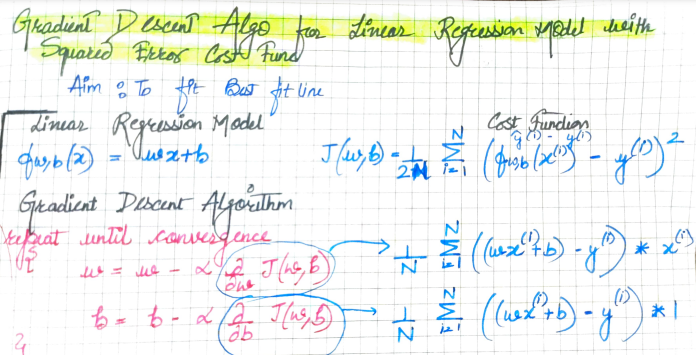

In [21]:
'''def computeCost(X, Y, w, b):
    #### Compute cost J
    return J

def gradientDescent (X, Y, learningRate, numIterations):
    w, b = 0, 0
    errorList =[] ### Store cost in each iteration
    for i in range(numIterations):
        Y_pred = #COMPUTE f(X)
        ### compute updated w and b
        costJ = computeCost(X, Y, w, b)
        errorList.append(costJ)'''

'def computeCost(X, Y, w, b):\n    #### Compute cost J\n    return J\n\ndef gradientDescent (X, Y, learningRate, numIterations):\n    w, b = 0, 0\n    errorList =[] ### Store cost in each iteration\n    for i in range(numIterations):\n        Y_pred = #COMPUTE f(X)\n        ### compute updated w and b\n        costJ = computeCost(X, Y, w, b)\n        errorList.append(costJ)'

(54.571778965642466,
 254.2303214260694,
 [34850.82993703304,
  34781.73459820219,
  34712.77818189456,
  34643.96040874839,
  34575.280999963805,
  34506.739677301666,
  34438.33616308241,
  34370.070180184994,
  34301.941452045714,
  34233.94970265708,
  34166.09465656678,
  34098.37603887641,
  34030.79357524055,
  33963.34699186547,
  33896.03601550816,
  33828.86037347514,
  33761.81979362139,
  33694.91400434922,
  33628.142734607216,
  33561.505713889084,
  33495.0026722326,
  33428.633340218475,
  33362.39744896931,
  33296.29473014845,
  33230.324915958954,
  33164.487739142474,
  33098.78293297817,
  33033.210231281635,
  32967.769368403846,
  32902.460079230026,
  32837.282099178636,
  32772.235164200225,
  32707.319010776464,
  32642.53337591897,
  32577.87799716831,
  32513.352612592902,
  32448.95696078799,
  32384.69078087452,
  32320.55381249816,
  32256.545795828202,
  32192.6664715565,
  32128.91558089644,
  32065.29286558188,
  32001.79806786612,
  31938.430930520826

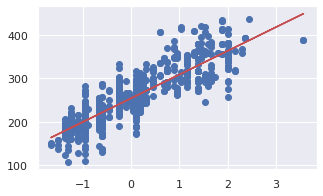

In [22]:
 gradientDescent (X, Y, 0.001, numIterations=5000)

**Case 1: Using very low learning rate, say alpha=0.0001**

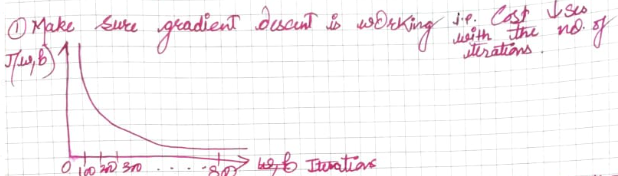

54.8218915829821 255.93085789568443


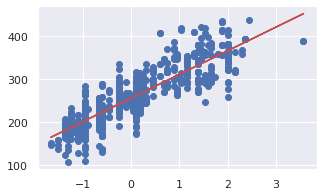

In [23]:
w,b,errorList = gradientDescent (X, Y, 0.1, numIterations=1000)
# Match w and b against the ones obtained in A and B part
# Plot iteration vs error
print(w,b)

**Case 2: Using very low learning rate, say alpha=0.1**

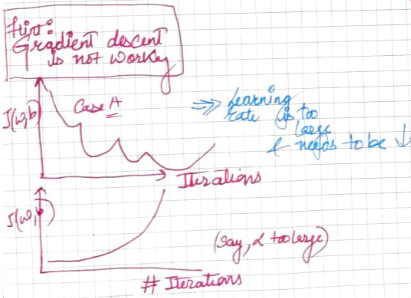

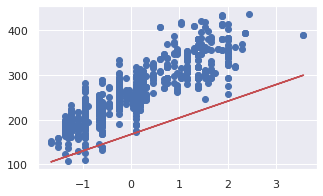

In [24]:
w,b,errorList = gradientDescent (X, Y, 0.1, numIterations=10)
# Match w and b against the ones obtained in A and B part
# Plot iteration vs error

### <font color='red'>**3.2 MULTIPLE-VARIABLE LINEAR REGRESSION: FEATURES- ['ENGINESIZE', 'FUELCONSUMPTION_COMB']**</font>

In [25]:
X = X_train
Y = Y_train
print(X.shape, Y.shape)

(853, 1) (853,)


In [26]:
#features = 'ENGINESIZE'
features =  ['ENGINESIZE','FUELCONSUMPTION_COMB']
X = df[features].values
Y = df['CO2EMISSIONS'].values


XScaled=StandardScaler().fit_transform(X)


X_train, X_test, Y_train, Y_test=train_test_split(XScaled,Y,random_state=51,test_size=0.20)




print("Dimensions of Original Data:")
print("Size(X):", X.shape, "; Size(Y)", Y.shape)
print("Dimensions of Training Data:")
print("Size(X_train):", X_train.shape, "; Size(Y_train)", Y_train.shape)
print("Dimensions of Test Data:")
print("Size(X_test):", X_test.shape, "; Size(Y_test)", Y_test.shape)


Dimensions of Original Data:
Size(X): (1067, 2) ; Size(Y) (1067,)
Dimensions of Training Data:
Size(X_train): (853, 2) ; Size(Y_train) (853,)
Dimensions of Test Data:
Size(X_test): (214, 2) ; Size(Y_test) (214,)


In [27]:
X = X_train
Y = Y_train

In [28]:
X=np.hstack((np.ones(X.shape[0]).reshape(X.shape[0],1),X))
X

array([[ 1.        , -1.23393109, -0.5685715 ],
       [ 1.        , -1.09261145, -0.94170999],
       [ 1.        ,  0.24992518, -0.16673004],
       ...,
       [ 1.        ,  0.10860554, -0.5685715 ],
       [ 1.        , -0.24469358, -0.0519182 ],
       [ 1.        , -0.9512918 , -0.62597742]])

In [29]:
X_T=X.T
mid1=np.dot(X_T,X)
mid2=np.dot(X_T,Y)
inv=np.linalg.inv(mid1)
W=np.dot(inv,mid2)
W


array([255.76664235,  27.55008002,  33.08842819])

<font color='blue'> **ESTIMATE REGRESSION COEFFICIENTS BY REPEATING B PART: NORMAL EQUATION METHOD FOR X_train:** </font>

In [30]:
##### TO DO

<font color='blue'> **ESTIMATE REGRESSION COEFFICIENTS BY REPEATING C PART: GRADIENT DESCENT METHOD FOR X_train:** </font>

In [31]:
X=X_train
len(X)

853

In [32]:
##### TO DO

X=X_train



def computeCost(X, Y, w1,w2, b):
    J=((((w1*X[:,0]+w2*X[:,1]+b)-Y)**2).sum())*(1/(2*len(X)))
    return J

def gradientDescent (X, Y, learningRate, numIterations):
    w1,w2, b = 0, 0,0
    errorList =[] ### Store cost in each iteration
    for i in range(numIterations):
        #Y_pred = w*X+b
        w1_change=w1-learningRate*(((1/len(X)))*(((w1*X[:,0]+w2*X[:,1]+b)-Y)*X[:,0]).sum())
        w2_change=w2-learningRate*(((1/len(X)))*(((w1*X[:,0]+w2*X[:,1]+b)-Y)*X[:,1]).sum())
        b_change=b-learningRate*(((1/len(X)))*(((w1*X[:,0]+w2*X[:,1]+b)-Y)*1).sum())
        w1=w1_change
        w2=w2_change 
        b=b_change
        ### compute updated w and b
        costJ = computeCost(X, Y, w1,w2, b)
        errorList.append(costJ)
    #print(errorList)
#     plt.scatter(X_train,Y_train)
#     plt.plot(X_train,w*X_train+b,c='r')
    return (w1,w2,b,errorList)

w1,w2,b,errorList = gradientDescent (X, Y, 0.1, numIterations=1000)



In [60]:
w1,w2,b

(27.5500800299703, 33.08842817317701, 255.76664235444488)

*Optional: Try if you can come up with predicted equation represented through plane and points referring to dataset [Reference: Ankit]*
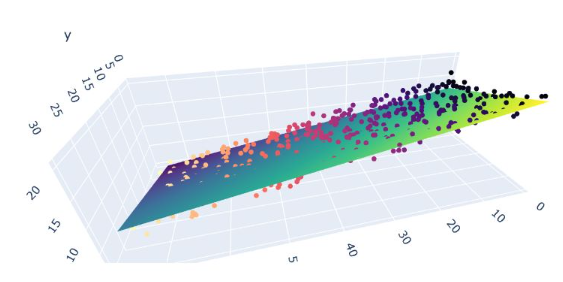

### <font color='red'>**3.3 LINEAR REGRESSION USING PRE-DEFINED LinearRegression Class**</font>

In [ ]:
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(X_train,Y_train)

In [ ]:
print("Weight/Slope W [W1, W2]:", LRModel.coef_)
print("Bias/Intercept B:", LRModel.intercept_)
coeff_df = pd.DataFrame(LRModel.coef_,df[features].columns,columns=['Coefficient'])
coeff_df


## **STEP 4:Evaluating Performance of Model**

In [ ]:
Y_pred = LRModel.predict(X_test)
plt.scatter(Y_test,Y_pred)

<font color='blue'>**PERFORMANCE ON TEST PARTITION**</font>

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))